# Graph Manipulation in GNNs

## General GNN Framework
- Idea: Raw input graph != computational graph
    - Graph feature augmentation
    - Graph structure manipulation
    - 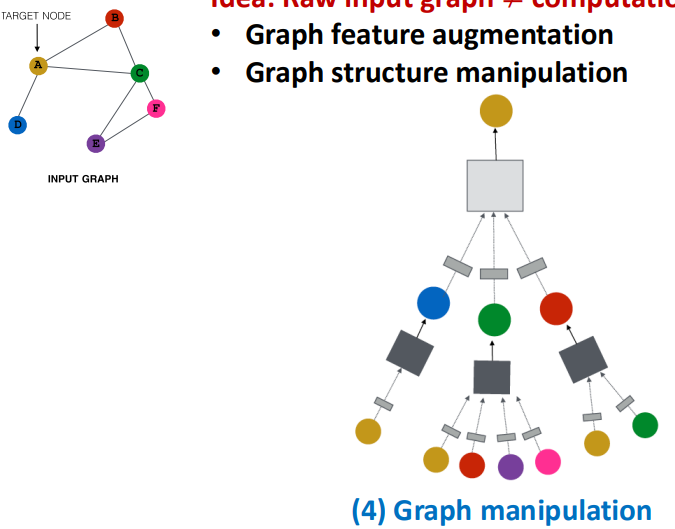

## Why Manipulate Graphs
- Our assumption so far has been
    - Raw input graph = computational graph
- Reasons for breaking this assumption
    - Feature level:
        - The input graph lacks features -> Feature augmentation
    - Structure level
        - The graph is too sparse -> inefficient message passing
        - The graph is too dense -> message passing is too costly
        - The graph is too large -> cannot fit the computational graph into a GPU
    - It's just unlikely that the input graph happens to be the optimal computation graph for embeddings.

## Graph Manipulation Approaches
- Graph Feature manipulation
    - The input graph lacks features -> feature augmentation
- Graph structure manipulation
    - The graph is too sparse -> Add virtual nodes / edges
    - The graph is too dense -> Sample neighbors when doing message passing
    - The graph is too large -> Sample subgraphs to compute embeddings

## Feature Augmentation on Graphs
- Why do we need feature augmentation?
    1. Input graph does not have node features
        - This is common when we only have the adj. matrix
    - Standard approahes:
        1. Assign constant values to nodes
            - 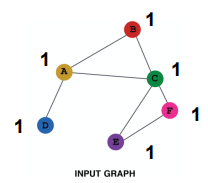
        2. Assign unique IDs to nodes
            - These IDs are converted into one-hot vectors
            - 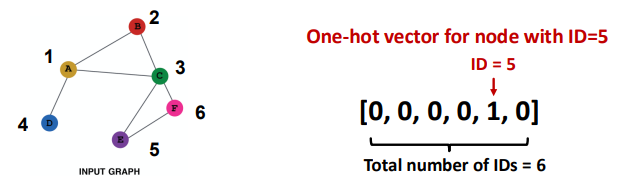

- 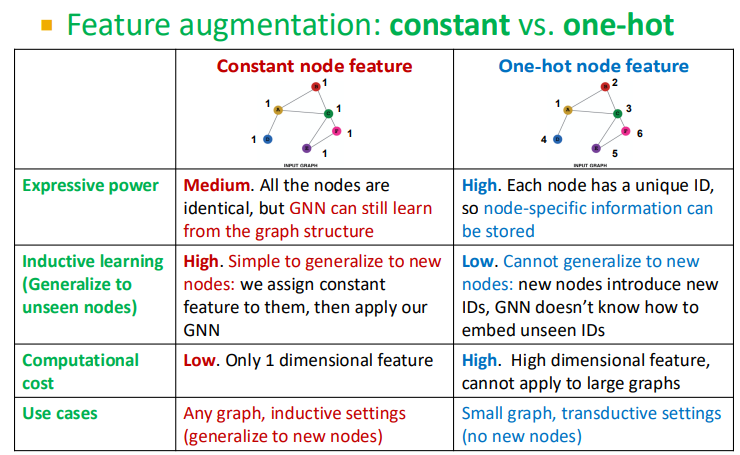

- Why do we need feature augmentation?
    2. Certain structures are hard to learn by GNN
    - Example: cycle count feature
    - Can GNN learn the lenght of a cycle that v1 resides in? No
    - 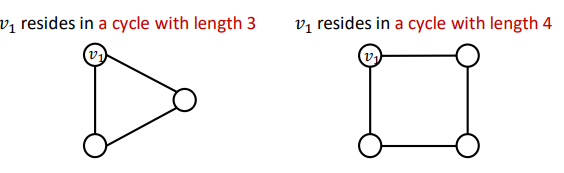
    - v1 cannot differentiate which graph it resides in
        - Because all the nodes in the graph have degree of 2
        - The computational graphs will be the samme binary tree
    - 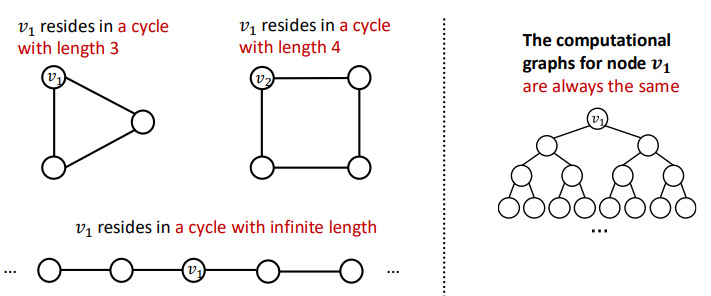
- Solutiom;
    - We can use cylce count as augmented node features
    - 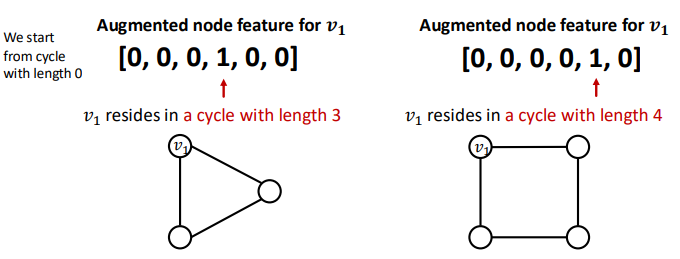

### Add Virtual Nodes / Edges
- Motivation: Augment sparse graph
- Add virtual nodes
- The virutal node will connect to all the nodes in the graph
    - Suppose in a sparse graph, 2 nodes have shortest path distance of 10
    - After adding the virtual node, all the nodes will have a distance of 2.
        - Node A - Virtual node - Node B
    - 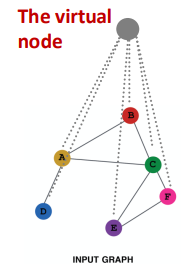
- Benefits: Greatly improves message passing in sparse graphs

## Node Neighborhood sampling
- Our approach so far:
    - All the neighbors are used for message passing
- Problem: Dense / Large graphs, high-dgree nodes
    - 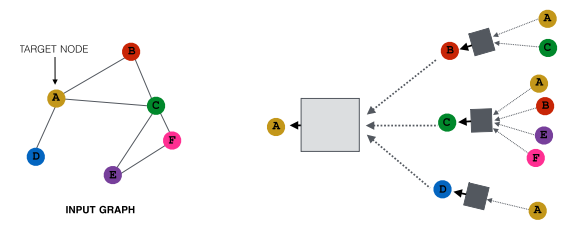
- New Idea: (Randomly) determine a node's neighborhood for message passing
- For example, we can randomly choose 2 neighbors to pass messages
    - Only nodes B and D will pass message to A
    - 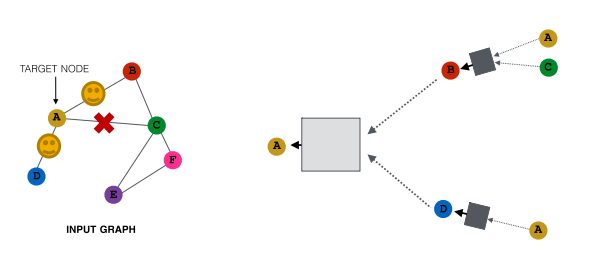
    - Next time when we compute the embeddings, we can sample different neighbors
    - 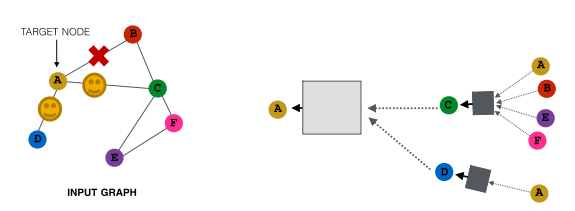
- In expectation, we get embeddings similar to the case where all the neighbors are used
    - Benefirts: Greatly reduce computational cost
    - It works gret in practice
    - 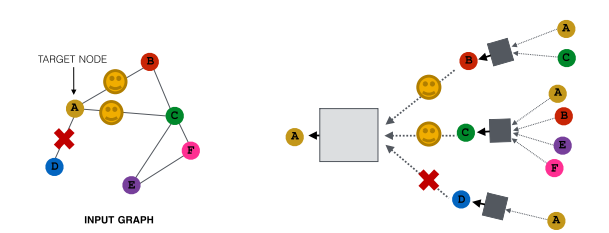

# Prediction with GNNs
- How do we train a GNN?

## GNN Pipeline
- 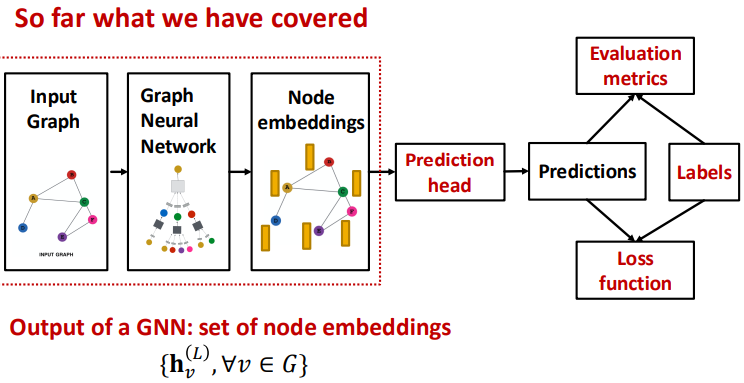
- Now prediction head
- Different prediction heads:
    1. Node level tasks
    2. Edge level tasks
    3. Graph level tasks

## GNN Prediction Heads
- Idea: Different task level require different prediction heads
- 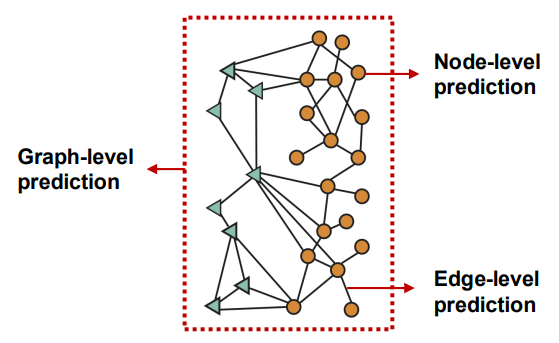

## Prediction Heads: Node-level
- Node-level prediction: We can directly make prediction using node embeddings!
- After GNN computation, we have d-dim node embedings:
    - 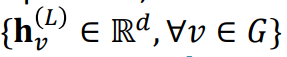
- Suppose we want to make k-way prediction
    - Classification: classify among k categories
    - Regression: regress on k targets
- 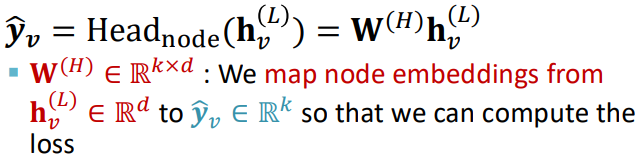

## Prediction Heads: Edge-level
- Edge-level prediction: Make prediction using pairs of node embeddings
- Suppose we want to make k-way prediction
- 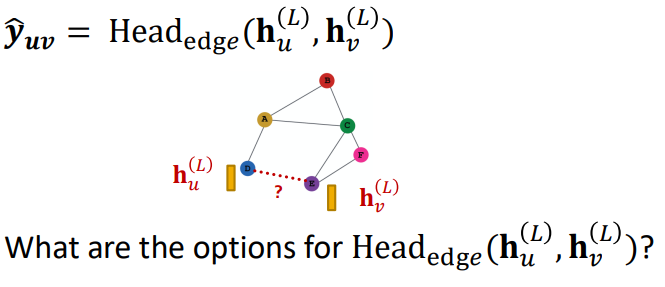
- Options for Head_edge(h(L)_u, h(L)_v)
    1. Concatenation + Linear
        - We have seen this in graph attention
        - 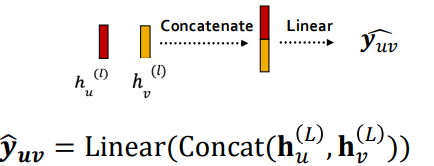
        - Here Linear(.) will map 2d-dimensional embeddings (since we concatenated embeddings) to k-dim embeddings(k-way prediction)
    2. Dot Product
        - 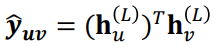
        - This approach only applies to 1-way prediction (e.g., link prediction: predict the existence of an edge)
        - Apply to k-way prediction
            - 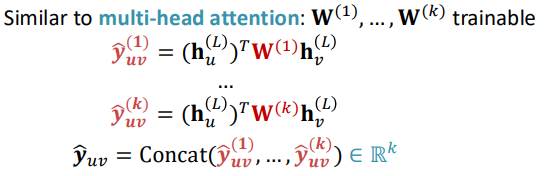

## Prediction Heads: Graph Level
- Graph level prediction: Make prediction using all the ndoe embeddings in our graph.
- suppose we want to make k-way prediction
- 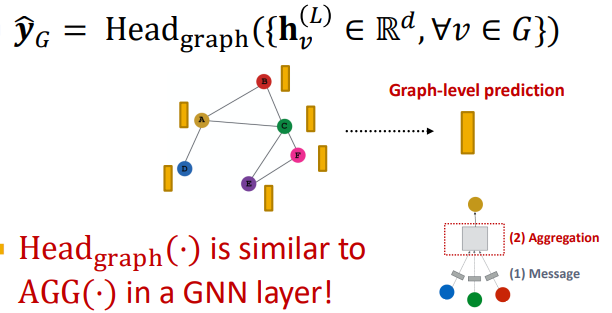
- 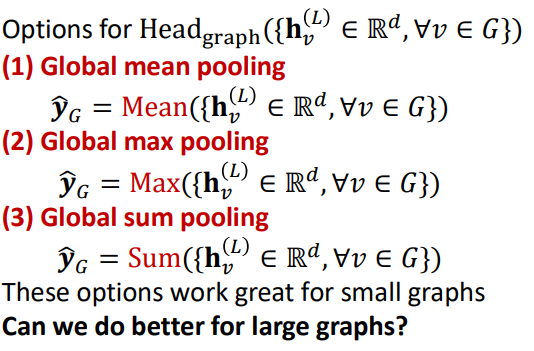

## Issue of Global Pooling
- Issue: Global pooling over a (large) graph will lose information
- Toy example: We use 1-dim node embeddings
    - Node embeeding for G1: {-1, -2, 0, 1, 2}
    - Node embedding for G2: {-10, -20, 0, 10, 20}
    - clearly G1 and G2 have very different node embeddings
        - their sturctures should be different
    - If we do global sum pooling
        - Prediction for G1: y_G = Sum({-1, -2, 0, 1, 2}) = 0
        - prediction for G2: y_G = sum({-10, -20, 0, 10, 20}) = 0
        - We cannot differentiate G1 and G2.

## Add Virtual super Node
- To embed a graph add virtual super node
    - The virtual node will connect to all the nodes in the graph
    - Benefits: GNN learns how to encode the entire input graph.
- 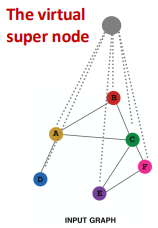

## Training Graph Neural Networks
- Where does ground-truth come from?
    - Supervised labels
    - Unsupervised signals
- 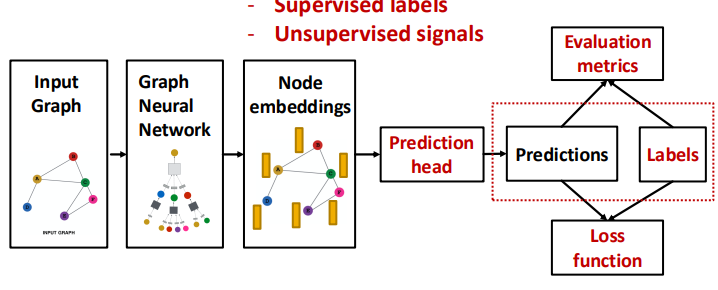

## supervised vs unsupervised
- supervised learning on graphs
    - Labels come from external sources
        - E.g., predict drug likeness of a molecular graph
- Unsupervised learning on graphs
    - Siganls come from graphs themselves
        - E.g., link prediction: Predict if 2 nodes are connected
- Sometimes the differencees are blurry
    - We still have 'supervision' in unsupervised learning
        - E.g. train a GNN to predict node clustering coeffiicent
    - An alternative name for unsupervised is self-supervised

## Supervised Labels on Graphs
- supervised lables come from the specific use cases. For example:
    - Node labels y_v: in a citation network, which subject area deos a node belong to
    - Edge labels y_uv: in a transaction network, whether an edge is fraudlent
    - Graph labels y_G: Among molecular graphs, the drug linkeness of graphs
- Advice: Reduce your taks to node / edge / graph labels, since they are easy to work with
    E.g., we knew some nodes from a cluster. We can treat the cluster that a ndoe belongs to as a node label.

## Unsupervised signals on Graphs
- Problem: Sometimes we only have a graph, without any external labels
- The solution: 'self supervised learning', we can find supervision signals within the graph.
    - For example, we can let GNN predict the following:
        - Node-level y_v. node statistics: such as clustering coefficient, pageRank,...
        - Edge-level y_uv. Link Prediction: Hide the edge between 2 nodes, predict it there should be a link
        - Graph-level y_G. Graph statistics: For example, predict if 2 graphs are isomorphic
    - these tasks do not require external labels

## 3. Graph pipeline
- How do we compute the final loss?
    - Classifiation loss
    - Regression loss
- 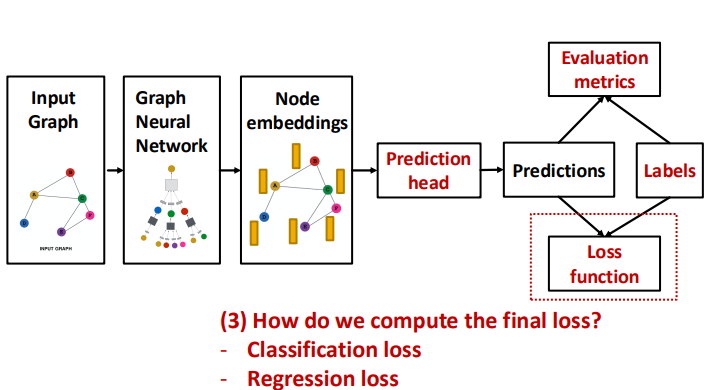

## Settings for GNN training
- The settings, we have N data points
    - Each data point can be a node/edge/graph
    - 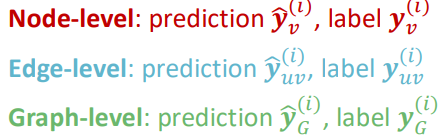
    - We will use prediction y_hat(i), label y(i) to refer predictions at all levels.

## classification or regression
- Classification: lebal y(i) with discrete value
    - E.g., node classification: which category does a node belong to
- Regression: labels y(i) with continous value
    - E.g., predict the drug likeleness of a molecular graph
- GNNs can be applied to both settings
- Differences: loss function & evaluation metrics

## Classification Loss:
- Cross entropy is a very common loss function in classification
- K-way prediction for ith data point:
    - 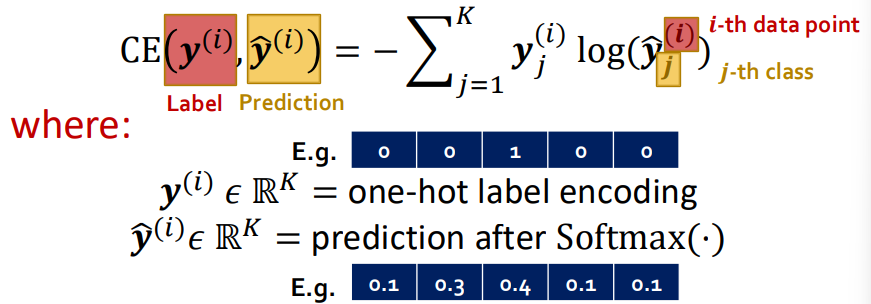
- Total loss over all N training examples
    - 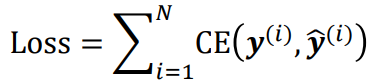

## Regression Loss
- For regression tasks we often use mean squared error (MSE) a.k.a L2 loss
- K way regression for data point(i)
    - 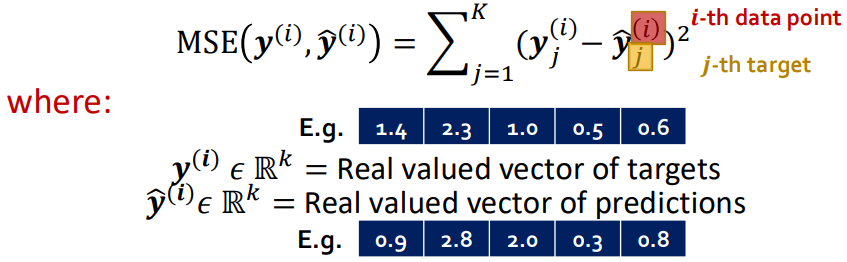
- Total loss over all N training examples:
    - 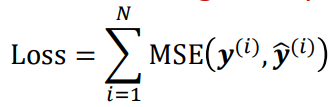

# Graph Pipeline 
- How do we measure the sucess of a GNN?
    - Accuracy
    - ROC AUC
- 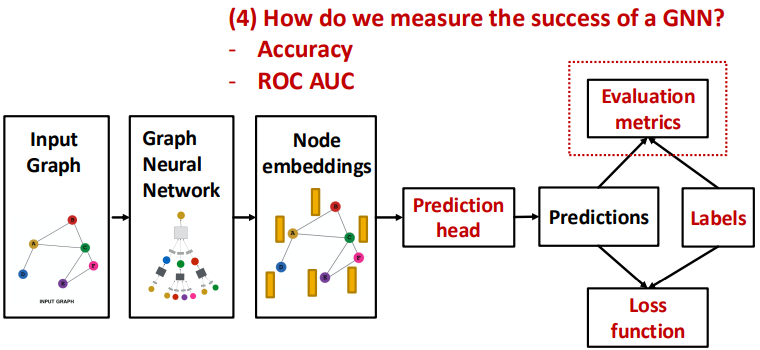

## Evaluation Metrics: Regression
- We us standard evaluation metrics for GNN
- Evaluate regression tasks on graphs
- Root mean square error (RMSE)
    - 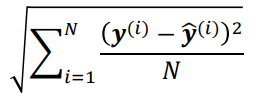
- MEan absolute error (MAE)
    - 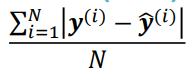

## Evaluation Metrics: classification
- Evalute classification tasks on graphs:
    1. Mutliple class classification
        - We simply report the accuracy
        - 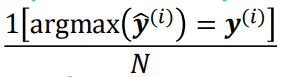
    2. Binary classification
        - Metrics sensitive to classification threshold
            - Accuracy
            - Precision / Recall
            - If the range of prediction is [0, 1], we will use 0.5 as threshold
        - Metrics Agnostic to classification
            -  ROC AUC
        - 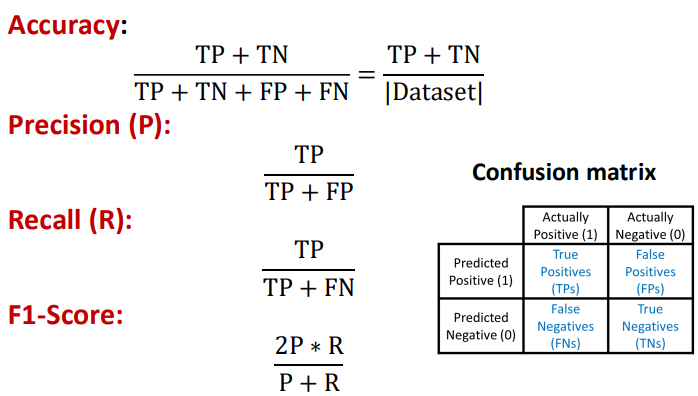
        - ROC curve: Captues the tradeoff in TPR ana FPR as the classification threshold is varied for a binary classifier
        - 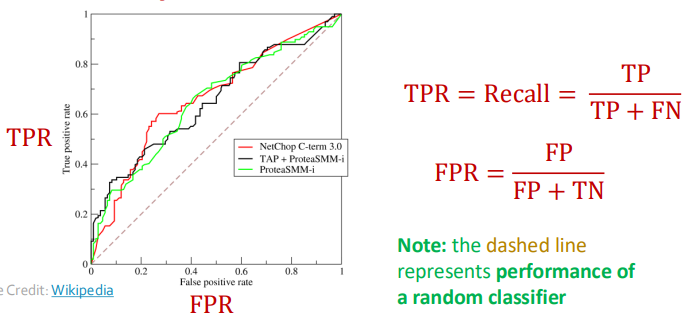
        - ROC AUC: Area under the ROC curve: Intution: The probability that a classifier will rank a randomly chosen positive instance higher than a random chosen negative one.

## Graph Training pipeline
- 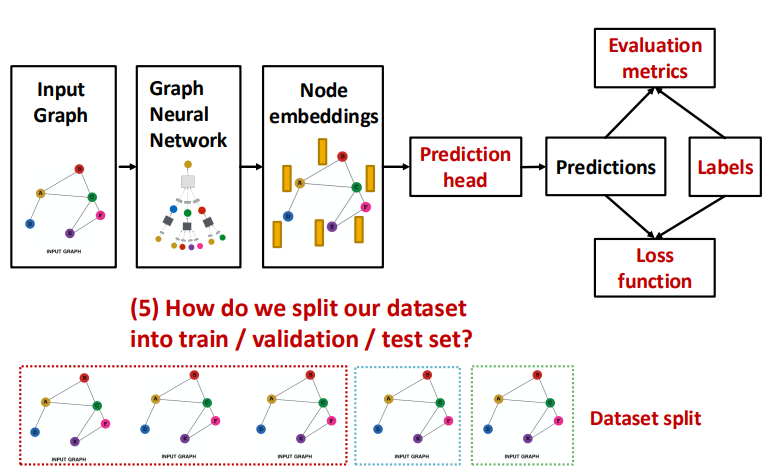

### Dataset split: Fixed / Random split
- Fixed split: We will split our dataset once
    - Training set: Used for optimizing GNN parameters
    - Validation set: Develop model/hyperparamters
    - Test set: Held out until we report final performance
- A concern: Sometime we cannot guarantee that the test set will really be held our.
- Random split: We will randomly split our dataset into training/validation/test
    - We report average performance over different random seeds.

## Why splitting graphs is sepcial
- Suppose we want to split an image dataset
    - Image classification: Each data point is an image
    - Here data points are independent
        - Image 5 will not affect our prediction on image 1
        - 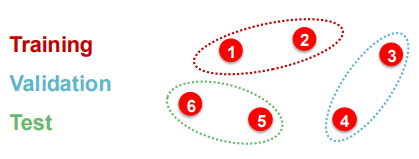
    - Splitting a graph dataset is different!
        - Node classification: Each data point is a node
        - Here data points are NOT independent
            - Node 5 will affect our prediction on node 1, because it will participate in message passing -> affect node 1's embedding
        - 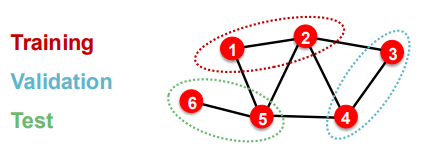
- Solution 1 (Transducive setting): The input graph can be observed in all the dataset splits (training, validation and test set)
- We will only split the (node) labels
    - At training time, we compute embeddings using the entire graph, and train using node 1 and 2's labels
    - At validation time, we compute embeddings using the entire graph, and evaluate on node 3 & 4's labels
- Solution 2 (Inductive setting): We break the edges between splits to get multiple graphs
    - Now we have 3 graphs that are independent. Node 5 will not affect our prediction on node 1 any more.
    - At training time, we compute embeddings using the graph over node 1 and 2, and train using node 1&2's labels.
    - At validation time, we compute embeddings using the graph over node 3 & 4, and evaluate on node 3 & 4's labels.
    - 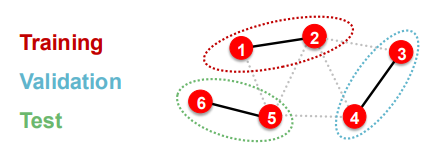

## Transductive / Inductive settings
- Transductive setting: training / validation / test sets are on the same graph
    - The dataset consist of one graph
    - The entire graph can be observed in all dataset splits, we only split the labels.
    - Only applicable to node / edge prediction tasks.
- Inductive setting: training / validation / test sets are on different graphs
    - The dataset consists of multiple graphs
    - Each split can only observe the graph(s) within the split. A succcessful model should generalize to unseen graphs
    - Applicable to node / edge / graph tasks.

## Exampple: Node classification
- Transductive node classification
    - All the splits can observe the entire graph structure, but can only observe the labels of their respective nodes
    - 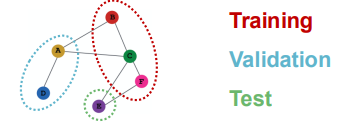
- Inductive node classification
    - suppose we have a dataset of 3 graphs
    - Each split contains an independent graph
    - 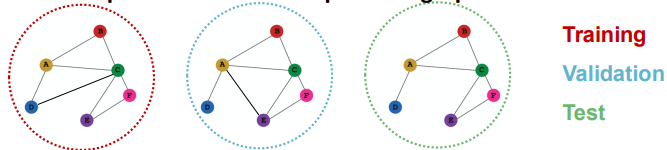

## Example: Graph Classification
- Only the inductive setting is well defined for graph classification
    - Because we have to test on unseen graphs
    - Suppose we have a dataset of 5 graphs. Each split will contain independent graph(s).
- 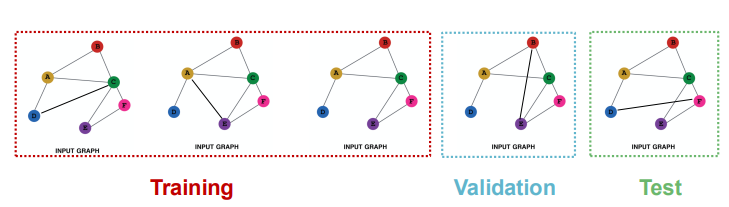

## Example: Link Prediction
- Goal of link prediction: Predict missing edges
- Setting up link prediction is tricky
    - Link prediction is an unsupervised / self-supervsied task. We need to create the labels and dataset splits on our own,
    - Concretely, we need to hide some edges from the GNN and let the GNN predict if the edges exist.
- 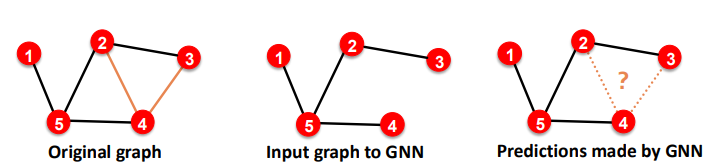

## Setting up Link Prediction
- 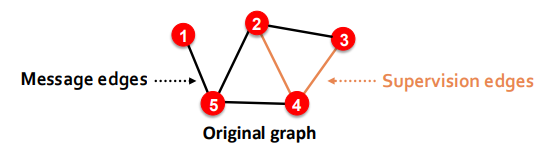
- For link predicition, we will split edges twice
- Step1: Assign 2 types of edges in the original graph
    - Message edges: Used for GNN message passing
    - Supervision edges: Use for computing objectives
    - After step1:
        - Only message edges will reamin in the graph
        - Supervision edges are used for supervision for edge predicitons made by model, will not fed into GNN.
- Step2: Split edges into train / validation / test
    - Option1: Inductive link prediction split
        - Supppose we have a dataset of 3 graphs. Each inductive split will contain an independent graph
        - 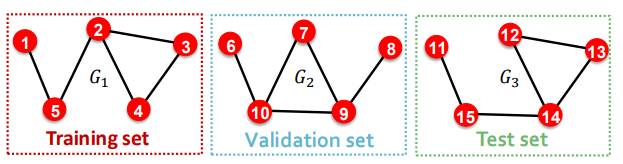
        - In train or val or test set, each graph will have 2 types of edges: message edges + supervision edges
        - 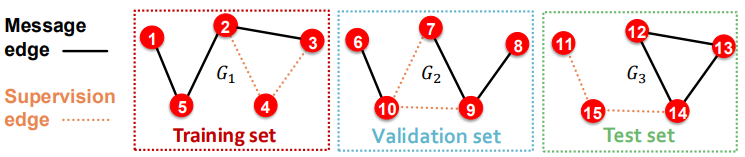
    - Option2: Transductive link prediction split;
        - This is the default setting when people talk about link prediction
        - Suppose we have a dataset of 1 graph
        - By definition of 'transductive', the entire graph can be observed in all dataset splits
            - But since edges are both part of graph structure and the supervision, we need to hold out validation / test edges
            - To train the taining set, we further need to hold out supervision edges for the training set
        - 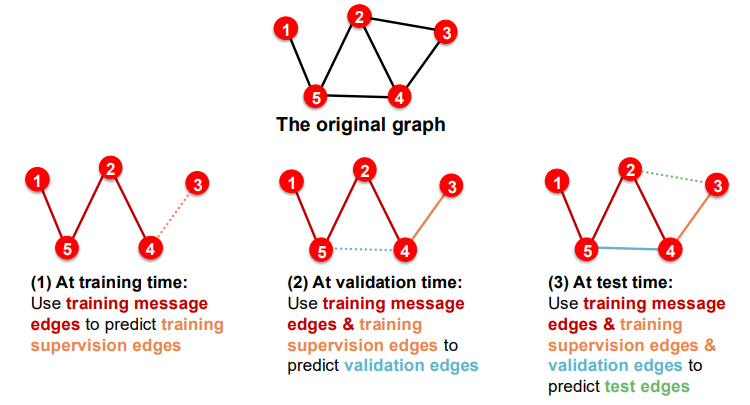
        - Why do we use growing number of edges? After trainig, supervision edges are known to GNN. Therefore, an ideal model should use supervision edges in message passing at validation time. The same applies to the test time.
        - 